# **Übung 1_2: Datenvorverarbeitung mit Pandas: Food Nutrient Database**
based on the nutrients database of the U.S. Department of Agriculture

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import json
import zipfile

In [ ]:
d = None  
data = None  
with zipfile.ZipFile("/content/drive/My Drive/Maschinelles Lernen/Übungen/foods-2011-10-03.json.zip", "r") as z:
   for filename in z.namelist():  
      print(filename)  
      with z.open(filename) as f:  
         #data = f.read()  
         d = json.load(f)

foods-2011-10-03.json


In [ ]:
np.shape(d)

(6636,)

Greifen Sie sich ein beliebiges
Nahrungsmittel heraus und lassen sich die Namen der Einträge mit der Methode dict.keys()
anzeigen. 

In [ ]:
for i in range(10):
  print(d[i]['nutrients'][0])

{'value': 25.18, 'units': 'g', 'description': 'Protein', 'group': 'Composition'}
{'value': 24.9, 'units': 'g', 'description': 'Protein', 'group': 'Composition'}
{'value': 4.22, 'units': 'g', 'description': 'Ash', 'group': 'Other'}
{'value': 5.2, 'units': 'g', 'description': 'Ash', 'group': 'Other'}
{'value': 3.27, 'units': 'g', 'description': 'Ash', 'group': 'Other'}
{'value': 3.72, 'units': 'g', 'description': 'Ash', 'group': 'Other'}
{'value': 31.8, 'units': 'g', 'description': 'Protein', 'group': 'Composition'}
{'value': 21.54, 'units': 'g', 'description': 'Protein', 'group': 'Composition'}
{'value': 16.41, 'units': 'g', 'description': 'Protein', 'group': 'Composition'}
{'value': 2.96, 'units': 'g', 'description': 'Protein', 'group': 'Composition'}


In [ ]:
d[0]['nutrients'][0]

{'description': 'Protein',
 'group': 'Composition',
 'units': 'g',
 'value': 25.18}

Kopieren Sie zunächst die Felder ’description’,’group’,’id’,’manufacturer’ in
einen eigenen DataFrame info

In [ ]:
info=pd.DataFrame(d, columns=['description', 'id', 'group', 'manufacturer'])
info

,description,id,group,manufacturer
0,"Cheese, caraway",1008,Dairy and Egg Products,
1,"Cheese, cheddar",1009,Dairy and Egg Products,
2,"Cheese, edam",1018,Dairy and Egg Products,
3,"Cheese, feta",1019,Dairy and Egg Products,
4,"Cheese, mozzarella, part skim milk",1028,Dairy and Egg Products,
...,...,...,...,...
6631,"Bologna, beef, low fat",42161,Sausages and Luncheon Meats,
6632,"Turkey and pork sausage, fresh, bulk, patty or...",42173,Sausages and Luncheon Meats,
6633,"Babyfood, juice, pear",43408,Baby Foods,None
6634,"Babyfood, dessert, banana yogurt, strained",43539,Baby Foods,None


Alle Nährstofflisten in ein Array von DataFrames,
wobei Sie an jeden DataFrame die entsprechende ID des Nahrungsmittels als eigene
Spalte anhängen.

Version1: id als Zeile an DataFrame angehängt

In [ ]:
Array1=[]
for i in np.arange(len(d)):
  naehrstoffe=pd.DataFrame(d[i]['nutrients'])
  id=d[i]['id']
  naehrstoffe['id']=id
  Array1.append([pd.DataFrame(naehrstoffe)])

In [ ]:
Array1[1]

[       value units                         description        group    id
 0     24.900     g                             Protein  Composition  1009
 1     33.140     g                   Total lipid (fat)  Composition  1009
 2      1.280     g         Carbohydrate, by difference  Composition  1009
 3      3.930     g                                 Ash        Other  1009
 4    403.000  kcal                              Energy       Energy  1009
 ..       ...   ...                                 ...          ...   ...
 232    0.000   mcg                 Vitamin B-12, added     Vitamins  1009
 233  105.000    mg                         Cholesterol        Other  1009
 234   21.092     g        Fatty acids, total saturated        Other  1009
 235    9.391     g  Fatty acids, total monounsaturated        Other  1009
 236    0.942     g  Fatty acids, total polyunsaturated        Other  1009
 
 [237 rows x 5 columns]]

Version2: id als einzelnes Element in Array

In [ ]:
Array2=[]
for i in np.arange(len(d)):
  naehrstoffe=pd.DataFrame(d[i]['nutrients'])
  id=d[i]['id']
  Array2.append([id, naehrstoffe])

In [ ]:
Array2[0]

[1008,        value units                         description        group
 0     25.180     g                             Protein  Composition
 1     29.200     g                   Total lipid (fat)  Composition
 2      3.060     g         Carbohydrate, by difference  Composition
 3      3.280     g                                 Ash        Other
 4    376.000  kcal                              Energy       Energy
 ..       ...   ...                                 ...          ...
 157    1.472     g                              Serine  Amino Acids
 158   93.000    mg                         Cholesterol        Other
 159   18.584     g        Fatty acids, total saturated        Other
 160    8.275     g  Fatty acids, total monounsaturated        Other
 161    0.830     g  Fatty acids, total polyunsaturated        Other
 
 [162 rows x 4 columns]]

Dieses Array wird mithilfe der Funktion pandas.concat() zu einem großen DataFrame
nutrients (389355 Einträge) vereinigt.

In [ ]:
nutrients=pd.DataFrame(columns=['value', 'units', 'description', 'group', 'id'])
for i in np.arange(len(Array1)):
  for element in Array1[i]:
    nutrients=pd.concat([nutrients, element])

In [ ]:
nutrients

,value,units,description,group,id
0,25.180,g,Protein,Composition,1008
1,29.200,g,Total lipid (fat),Composition,1008
2,3.060,g,"Carbohydrate, by difference",Composition,1008
3,3.280,g,Ash,Other,1008
4,376.000,kcal,Energy,Energy,1008
...,...,...,...,...,...
45,0.000,mcg,"Vitamin B-12, added",Vitamins,43546
46,0.000,mg,Cholesterol,Other,43546
47,0.072,g,"Fatty acids, total saturated",Other,43546
48,0.028,g,"Fatty acids, total monounsaturated",Other,43546


Entfernen Sie alle Duplikate aus diesem DataFrame.

In [ ]:
print(nutrients.duplicated().any())
nutrients=nutrients.drop_duplicates()

True


Bevor beide DataFrames vereinigt werden können, gibt es noch ein Problem: beide
enthalten Felder mit dem Namen ’description’ und ’group’ (s.o.). Benennen Sie
diese daher mithilfe von DataFrame.rename() in eindeutige Namen um.

In [ ]:
nutrients=nutrients.rename(columns={'description' : 'n_description', 'group' : 'n_group'})

Vereinigen Sie beide DataFrames anhand der Nahrungsmittel-ID.

In [ ]:
infoExtended=pd.merge(nutrients, info, on='id', how='outer')

Lesen Sie dazu alle Tabelleneinträge mithilfe einer geeigneten Indizierung
in einen DataFrame aus, der nur Einträge zum Nährstoff Zink enthält.

In [ ]:
zink=infoExtended.loc[(infoExtended['n_description'] == 'Zinc, Zn')]

In [ ]:
zink

,value,units,n_description,n_group,id,description,group,manufacturer
14,2.94,mg,"Zinc, Zn",Elements,1008,"Cheese, caraway",Dairy and Egg Products,
75,3.11,mg,"Zinc, Zn",Elements,1009,"Cheese, cheddar",Dairy and Egg Products,
151,3.75,mg,"Zinc, Zn",Elements,1018,"Cheese, edam",Dairy and Egg Products,
222,2.88,mg,"Zinc, Zn",Elements,1019,"Cheese, feta",Dairy and Egg Products,
293,2.76,mg,"Zinc, Zn",Elements,1028,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,
...,...,...,...,...,...,...,...,...
374940,1.83,mg,"Zinc, Zn",Elements,42161,"Bologna, beef, low fat",Sausages and Luncheon Meats,
374991,3.17,mg,"Zinc, Zn",Elements,42173,"Turkey and pork sausage, fresh, bulk, patty or...",Sausages and Luncheon Meats,
375043,0.08,mg,"Zinc, Zn",Elements,43408,"Babyfood, juice, pear",Baby Foods,None
375093,0.26,mg,"Zinc, Zn",Elements,43539,"Babyfood, dessert, banana yogurt, strained",Baby Foods,None


Daraus wählen
Sie wiederum die Spalte mit dem Zinkgehalt in mg (’value’) aus und stellen dafür ein
Histogramm und eine Liste deskriptiver Statistiken dar.

In [ ]:
value=pd.DataFrame(zink['value'])

In [ ]:
value.describe()

,value
count,6137.000000
mean,2.228589
std,3.975321
min,0.000000
25%,0.340000
50%,0.980000
75%,2.980000
max,90.950000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5b51280be0>]],
      dtype=object)

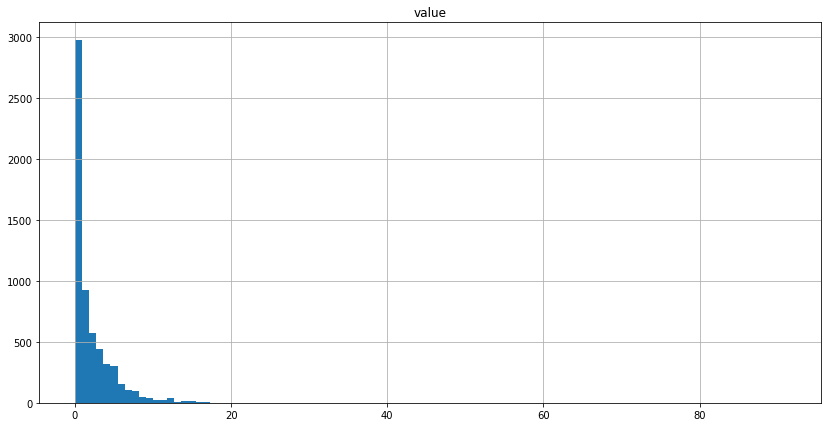

In [ ]:
value.hist(figsize=(14,7), bins=100)

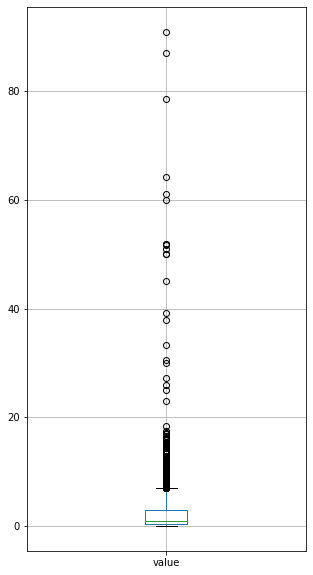

In [ ]:
value.boxplot(figsize=(5,10))

Finden Sie in Ihrer Tabelle Edamer
(’Cheese, edam’). Hat Edamer einen überdurchschnittlichen Zinkgehalt?

In [ ]:
Edam=zink.loc[(zink['description'] == 'Cheese, edam')]

In [ ]:
Edam

,value,units,n_description,n_group,id,description,group,manufacturer
151,3.75,mg,"Zinc, Zn",Elements,1018,"Cheese, edam",Dairy and Egg Products,


**Edammer hat einen Zinkgehalt von 3.75 mg, der Durchschnitt ist 2.23 mg.
--> Edammer hat einen überdurchschnittlichen Zinkgehalt**

Haben mehr als 75% aller Nahrungsmittel einen kleineren Zinkgehalt?

**75%-Quantil = 2.98 --> Mindestens 75% aller Nahrungsmittel, haben einen niedrigeren Zinkgehalt als Edammer**

Welches Nahrungsmittel hat den
maximalen Zinkgehalt?

In [ ]:
zink.loc[zink['value'].idxmax()]

value                                        90.95
units                                           mg
n_description                             Zinc, Zn
n_group                                   Elements
id                                           15170
description      Mollusks, oyster, eastern, canned
group               Finfish and Shellfish Products
manufacturer                                      
Name: 333726, dtype: object

In [ ]:
zink[zink['value']==zink['value'].max()]

,value,units,n_description,n_group,id,description,group,manufacturer
333726,90.95,mg,"Zinc, Zn",Elements,15170,"Mollusks, oyster, eastern, canned",Finfish and Shellfish Products,


**--> Mollusks, oyster, eastern, canned hat den maximalen Zinkgehalt.**